# DNNによる数字画像分類

## フレームワークとライブラリの読み込み

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from sklearn.datasets import load_digits#データ用
from sklearn.model_selection import train_test_split#分割用

In [2]:
digits = load_digits()
train_data, valid_data, train_label, valid_label = train_test_split(digits.data,digits.target, test_size=0.2)

## データの作成

In [3]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

## ネットワークの登録

In [4]:
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

## 学習の実行

In [5]:
model.fit(
    x = train_data,
    y = train_label,
    epochs=20,
    batch_size=100,
    validation_data=(valid_data, valid_label),
)

Epoch 1/20
15/15 [==============================] - 1s 12ms/step - loss: 3.3680 - accuracy: 0.2930 - val_loss: 1.1549 - val_accuracy: 0.6139
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.7704 - val_loss: 0.4916 - val_accuracy: 0.8750
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8977 - val_loss: 0.3137 - val_accuracy: 0.9222
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9353 - val_loss: 0.2497 - val_accuracy: 0.9417
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9652 - val_loss: 0.2165 - val_accuracy: 0.9444
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9770 - val_loss: 0.1864 - val_accuracy: 0.9528
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9833 - val_loss: 0.1910 - val_accuracy: 0.9500
Epoch 8/20
15/15 [=

## モデルの保存

In [6]:
model.save(os.path.join('result', 'outmodel'))

INFO:tensorflow:Assets written to: result\outmodel\assets


## 学習後のテスト

## モデルの読み込み

連続で行う場合は必要ない

In [7]:
model = tf.keras.models.load_model(os.path.join('result', 'outmodel'))

## 表示用ライブラリの読み込み

In [8]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 66ms/step
input: 0, result: 0


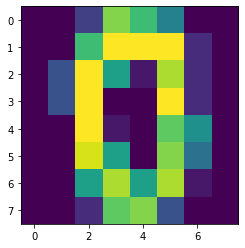

In [9]:
#テストする画像番号を設定
test_num = 20

#画像の読み込み
image = digits.data[test_num][np.newaxis, :]# バッチ次元を追加
predictions = model.predict(image)#推論
result = np.argmax(predictions)

print(f'input: {digits.target[test_num]}, result: {result}')
plt.imshow(digits.images[test_num])